In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.preprocessing as sp
import numpy as np

In [2]:
df = pd.read_csv('Train.csv')
print(df)
df.drop_duplicates(keep='first', ignore_index=False, inplace=True)
print(df.isnull().any())

       年龄  工作情况     教育  教育时间    婚姻状况   职业类型 家庭角色   民族 性别  投资收入  投资损失  工作天数  \
0      35    个体     初三     5  已婚平民配偶   其他职业   丈夫  民族D  男     0     0    40   
1      37  中央部委    高中生     9  已婚平民配偶     保安   丈夫  民族D  男     0     0    40   
2      19    个体     初三     5      未婚  手工艺维修   孩子  民族D  男     0     0    20   
3      33    个体    大学生    13  已婚平民配偶   专业技术   丈夫  民族D  男     0     0    60   
4      22    个体  大学未毕业    10      未婚  手工艺维修   离家  民族D  男     0     0    40   
...    ..   ...    ...   ...     ...    ...  ...  ... ..   ...   ...   ...   
38837  34    个体    大学生    13  已婚平民配偶   专业技术   妻子  民族A  女     0     0    35   
38838  39    个体    高中生     9  已婚平民配偶   机械操作   丈夫  民族D  男     0     0    40   
38839  51    个体    高中生     9      离婚  手工艺维修   离家  民族D  男     0     0    40   
38840  25    个体     初三     5      未婚   管理文书   未婚  民族D  女     0     0    40   
38841  34    个体    高中生     9  已婚平民配偶   技术支持   丈夫  民族D  男     0     0    40   

         省份  Y  
0      省份22  0  
1       省份8  0  
2       省份8 

In [3]:
labels = df['Y'].tolist()
plt.rcParams['font.sans-serif'] = ['SimHei']

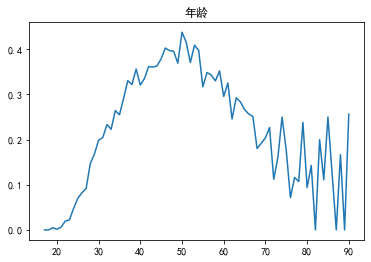

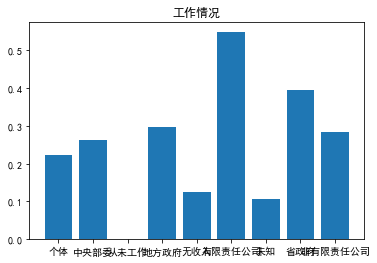

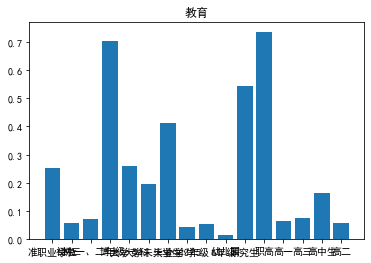

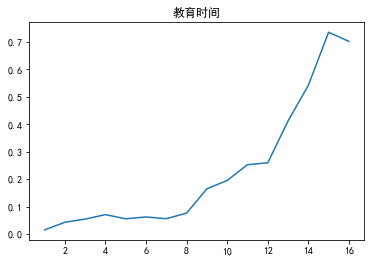

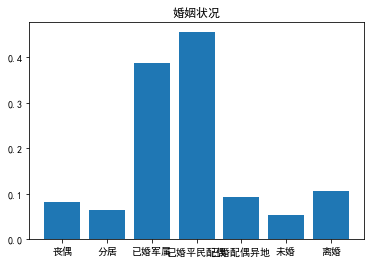

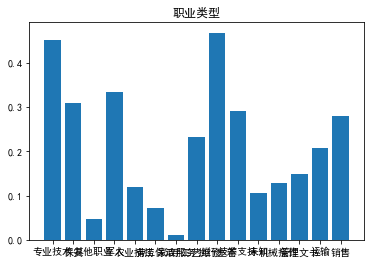

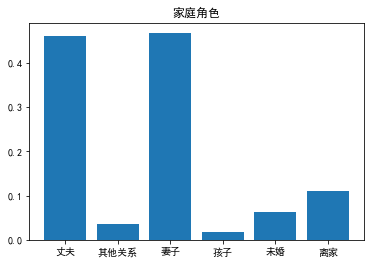

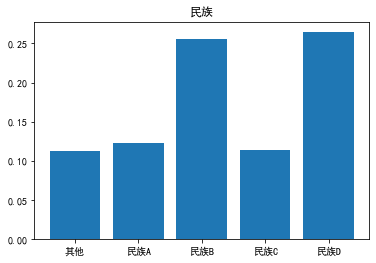

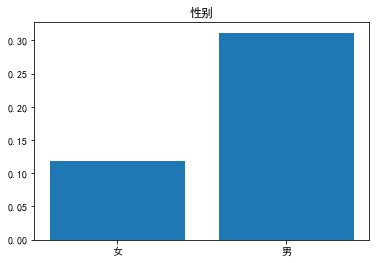

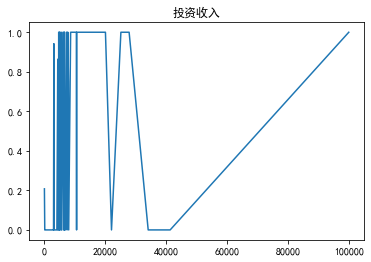

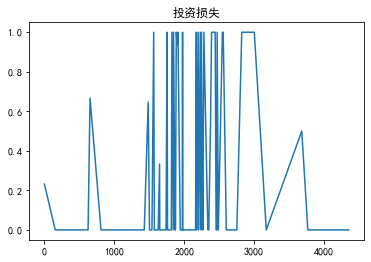

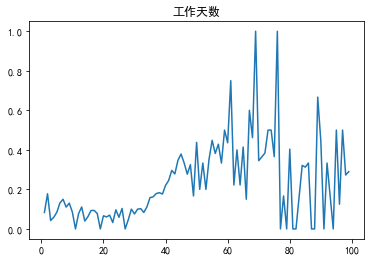

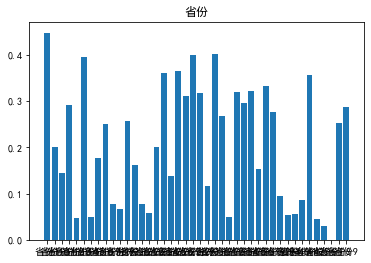

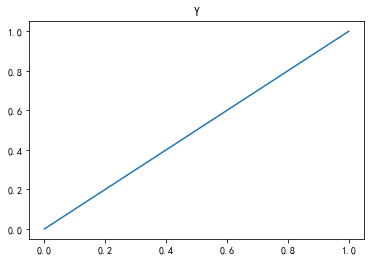

In [4]:
cols = df.columns
for col in list(cols):
    d = defaultdict(list)
    data = df[col].tolist()
    for i,j in zip(data,labels):
        d[i].append(j)
    xy = sorted([[i,sum(j)/len(j)] for i,j in d.items()])
    x = [i[0] for i in xy]
    y = [i[1] for i in xy]
    if df[col].dtype != 'int64':
        plt.bar(x,y)
    else:
        plt.plot(x,y)
    plt.title(col)
    plt.show()

In [5]:
spl = sp.LabelEncoder()
for col in list(df.columns):
    if df[col].dtype != 'int64':
        df[col] = spl.fit_transform(df[col])
df

,年龄,工作情况,教育,教育时间,婚姻状况,职业类型,家庭角色,民族,性别,投资收入,投资损失,工作天数,省份,Y
0,35,0,1,5,3,2,0,4,1,0,0,40,14,0
1,37,1,14,9,3,1,0,4,1,0,0,40,40,0
2,19,0,1,5,5,7,3,4,1,0,0,20,40,0
3,33,0,6,13,3,0,0,4,1,0,0,60,40,1
4,22,0,5,10,5,7,5,4,1,0,0,40,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38834,67,8,4,12,3,8,0,4,1,0,0,50,40,0
38835,51,0,15,7,6,11,4,1,0,5455,0,40,40,0
38837,34,0,6,13,3,0,2,1,0,0,0,35,40,0
38840,25,0,1,5,5,12,4,4,0,0,0,40,14,0


In [6]:
x_train = df.drop(['Y'], axis=1)
y_train = df['Y']

In [7]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
x_test = pd.read_csv('Test.csv')
for col in list(x_test.columns):
    if x_test[col].dtype != 'int64':
        x_test[col] = spl.fit_transform(x_test[col])
x_test = pd.read_csv('Test.csv')
for col in list(x_test.columns):
    if x_test[col].dtype != 'int64':
        x_test[col] = spl.fit_transform(x_test[col])
predictY = RFC.predict(x_test)
print('随机森林结果完成')
predictY = pd.DataFrame(predictY)
predictY.to_csv('Results_1.csv', encoding = 'utf-8', index=False , header=False)
predictY

随机森林结果完成


,0
0,0
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [8]:
LG = LogisticRegression()
LG.fit(x_train,y_train)
x_test = pd.read_csv('Test.csv')
for col in list(x_test.columns):
    if x_test[col].dtype != 'int64':
        x_test[col] = spl.fit_transform(x_test[col])
x_test = pd.read_csv('Test.csv')
for col in list(x_test.columns):
    if x_test[col].dtype != 'int64':
        x_test[col] = spl.fit_transform(x_test[col])
predictY = LG.predict(x_test)
print('逻辑回归结果完成')
predictY = pd.DataFrame(predictY)
predictY.to_csv('Results_2.csv', encoding = 'utf-8', index=False , header=False)
predictY

逻辑回归结果完成


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0
0,0
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [9]:
LG = LogisticRegression(solver='saga')
LG.fit(x_train,y_train)
x_test = pd.read_csv('Test.csv')
for col in list(x_test.columns):
    if x_test[col].dtype != 'int64':
        x_test[col] = spl.fit_transform(x_test[col])
x_test = pd.read_csv('Test.csv')
for col in list(x_test.columns):
    if x_test[col].dtype != 'int64':
        x_test[col] = spl.fit_transform(x_test[col])
predictY = LG.predict(x_test)
print('优化逻辑回归结果完成')
predictY = pd.DataFrame(predictY)
predictY.to_csv('Results_3.csv', encoding = 'utf-8', index=False , header=False)
predictY

优化逻辑回归结果完成


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,0
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0
